### 1. Data science Workflows/ML project Walkthrough

In [98]:
import pandas as pd


In [99]:
house_data = pd.read_csv("datasets/kigali houses data.csv")
house_data.head()

,Number,Location,Area,Price,Bedrooms,Bathrooms,Wardrobes,Cabinets,Balcony,Parking,Quarters
0,1,Kinyinya,25/35 m,55 000 000 Rwf,4.0,1.0,NaN,NaN,NaN,Yes,Yes
1,2,Gacuriro,sqm,180 000 000 Rwf,4.0,4.0,NaN,NaN,Yes,NaN,NaN
2,3,Kabeza,25/30 m,45 000 000 Rwf,4.0,3.0,NaN,NaN,NaN,NaN,NaN
3,4,NaN,sqm,8 500 000 Rwf,3.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Kimironko,sqm,28 000 000 Rwf,4.0,3.0,Yes,Yes,Yes,Yes,Yes


In [100]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4799 entries, 0 to 4798
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Number      4799 non-null   int64  
 1     Location  4241 non-null   object 
 2     Area      4799 non-null   object 
 3     Price     4799 non-null   object 
 4   Bedrooms    4270 non-null   float64
 5   Bathrooms   4510 non-null   float64
 6   Wardrobes   1021 non-null   object 
 7   Cabinets    1466 non-null   object 
 8   Balcony     1074 non-null   object 
 9   Parking     3220 non-null   object 
 10  Quarters    2820 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 412.5+ KB


In [101]:
house_data.nunique(dropna=False)

Number        4799
  Location     119
  Area         146
  Price        165
Bedrooms        15
Bathrooms       11
Wardrobes        2
Cabinets         2
Balcony          2
Parking          2
Quarters         2
dtype: int64

In [102]:
house_data.drop(columns='Number', inplace=True)
house_data

,Location,Area,Price,Bedrooms,Bathrooms,Wardrobes,Cabinets,Balcony,Parking,Quarters
0,Kinyinya,25/35 m,55 000 000 Rwf,4.0,1.0,NaN,NaN,NaN,Yes,Yes
1,Gacuriro,sqm,180 000 000 Rwf,4.0,4.0,NaN,NaN,Yes,NaN,NaN
2,Kabeza,25/30 m,45 000 000 Rwf,4.0,3.0,NaN,NaN,NaN,NaN,NaN
3,NaN,sqm,8 500 000 Rwf,3.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Kimironko,sqm,28 000 000 Rwf,4.0,3.0,Yes,Yes,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...
4794,Kanombe,sqm,52 000 000 Rwf,4.0,3.0,NaN,Yes,NaN,NaN,NaN
4795,NaN,500 sqm,14 000 000 Rwf,5.0,2.0,NaN,NaN,Yes,NaN,Yes
4796,Rugende,945 sqm,28 500 000 Rwf,5.0,3.0,NaN,NaN,NaN,NaN,NaN
4797,Kabuga,30/20 m,15 000 000 Rwf,4.0,1.0,Yes,Yes,Yes,Yes,NaN


In [103]:
nu = house_data.isnull().sum()

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_missing_values(df):
    """
    Shows the distribution of the non-missing vs mising values.
    """
    plt.figure(figsize=(10, 5))
    plt.title('Distribution of Missing Values')
    sns.heatmap(df.isnull(), cbar=False)


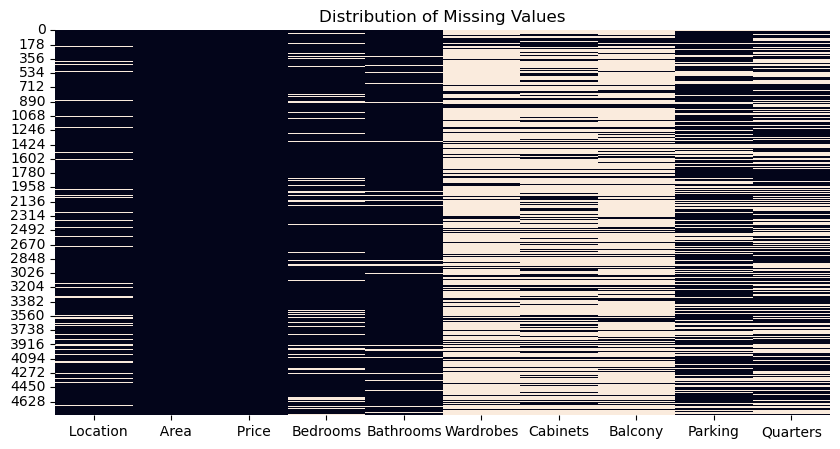

In [105]:
plot_missing_values(house_data)

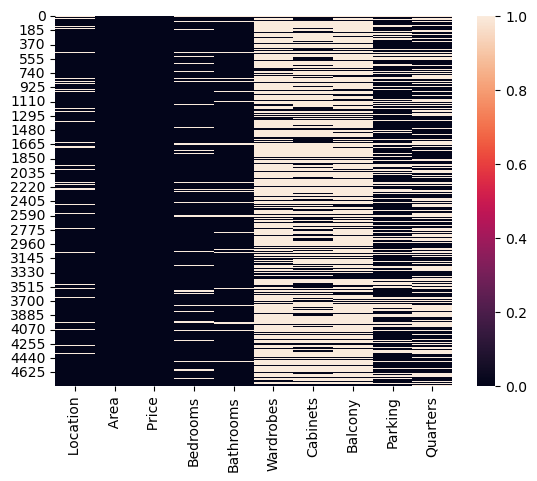

In [106]:
sns.heatmap(house_data.isnull());

In [107]:
### 2. 
house_data.columns = house_data.columns.str.strip().str.lower()
house_data.columns

Index(['location', 'area', 'price', 'bedrooms', 'bathrooms', 'wardrobes',
       'cabinets', 'balcony', 'parking', 'quarters'],
      dtype='object')

In [108]:
house_data['area'].value_counts()

 sqm        1809
25/30 m      730
20/30 m      494
25/20 m      232
30/20 m      158
            ... 
1/238 m        1
320 sqm        1
2383 sqm       1
18/25 m        1
1399 sqm       1
Name: area, Length: 146, dtype: int64

In [109]:
def clean_area(area):
    # Split the string by space
    parts = area.split()
    for part in parts:
       
        if '/' in part:
            # Split the part by '/'
            nums = part.split('/')
            # Convert the numbers to integers and multiply them
            return int(nums[0]) * int(nums[1])
        # Check if the part contains 'sqm'
        elif 'sqm' in part:
            # Return None if 'sqm' is found
            return None
        # Check if the part contains only digits
        elif part.isdigit():
            # Return the number if it contains only digits
            return int(part)
    # Return None if no valid number is found
    return None




In [110]:
print(clean_area('20/70 m'))

1400


In [111]:
house_data['clean_area'] = house_data['area'].apply(clean_area)
house_data['price'].value_counts()

55 000 000  Rwf     321
65 000 000  Rwf     271
60 000 000  Rwf     262
50 000 000  Rwf     256
35 000 000  Rwf     200
                   ... 
13 500  Rwf           1
500 000  Rwf          1
211 000 000  Rwf      1
 75 000 $             1
7 500 000  Rwf        1
Name: price, Length: 165, dtype: int64

In [112]:
def clean_price(price):
    
    price = price.lower()
    if 'rwf' in price:
        cln_price = price.replace('rwf', '').replace(' rwf', '').replace('rwf ', '').replace(' ','')
        return int(cln_price)
    elif '$' in price:
        cln_price = price.replace('$', '').replace(' $', '').replace('$ ', '').replace(' ','').replace('  ','')
        return int(cln_price) * 1300
    else:
        return None

In [113]:
house_data['clean_price'] = house_data['price'].apply(clean_price)
house_data

,location,area,price,bedrooms,bathrooms,wardrobes,cabinets,balcony,parking,quarters,clean_area,clean_price
0,Kinyinya,25/35 m,55 000 000 Rwf,4.0,1.0,NaN,NaN,NaN,Yes,Yes,875.0,55000000.0
1,Gacuriro,sqm,180 000 000 Rwf,4.0,4.0,NaN,NaN,Yes,NaN,NaN,NaN,180000000.0
2,Kabeza,25/30 m,45 000 000 Rwf,4.0,3.0,NaN,NaN,NaN,NaN,NaN,750.0,45000000.0
3,NaN,sqm,8 500 000 Rwf,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8500000.0
4,Kimironko,sqm,28 000 000 Rwf,4.0,3.0,Yes,Yes,Yes,Yes,Yes,NaN,28000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4794,Kanombe,sqm,52 000 000 Rwf,4.0,3.0,NaN,Yes,NaN,NaN,NaN,NaN,52000000.0
4795,NaN,500 sqm,14 000 000 Rwf,5.0,2.0,NaN,NaN,Yes,NaN,Yes,500.0,14000000.0
4796,Rugende,945 sqm,28 500 000 Rwf,5.0,3.0,NaN,NaN,NaN,NaN,NaN,945.0,28500000.0
4797,Kabuga,30/20 m,15 000 000 Rwf,4.0,1.0,Yes,Yes,Yes,Yes,NaN,600.0,15000000.0


In [114]:
house_data['location'].value_counts()

Kanombe        814
Kibagabaga     658
Kimironko      524
Kicukiro       423
Gacuriro       216
              ... 
S                1
Gisimenti        1
Kianombe         1
Residential      1
Kicukiri         1
Name: location, Length: 118, dtype: int64

In [115]:
neighborhoods = {'Fawe':'Gisozi','Gaposho':'Gisozi', 'Niboye':'Niboyi','Kibagaba':'Kibagabaga','Kimiromko':'Kimironko',
                 'Rusororo':'Kabuga/Ndera/Rusororo','Ndera':'Kabuga/Ndera/Rusororo', 'Kabuga':'Kabuga/Ndera/Rusororo',
                 'Murindi':'Kabuga/Ndera/Rusororo', 'Gasogi':'Kabuga/Ndera/Rusororo', 'Rdb':'Nyarutarama', 'Niboye':'Niboyi',
                 'Kibagababa':'Kibagabaga', 'Gishushu':'Nyarutarama','Masizi':'Zindiro', 'Karembure':'Gahanga',
                'Gatenga':'Gatenga/Gikondo','Gikondo':'Gatenga/Gikondo','Kibagaba':'Kibagabaga'}

In [116]:
house_data['clean location'] =  house_data['location'].replace(neighborhoods)

In [117]:
house_data.head()

,location,area,price,bedrooms,bathrooms,wardrobes,cabinets,balcony,parking,quarters,clean_area,clean_price,clean location
0,Kinyinya,25/35 m,55 000 000 Rwf,4.0,1.0,NaN,NaN,NaN,Yes,Yes,875.0,55000000.0,Kinyinya
1,Gacuriro,sqm,180 000 000 Rwf,4.0,4.0,NaN,NaN,Yes,NaN,NaN,NaN,180000000.0,Gacuriro
2,Kabeza,25/30 m,45 000 000 Rwf,4.0,3.0,NaN,NaN,NaN,NaN,NaN,750.0,45000000.0,Kabeza
3,NaN,sqm,8 500 000 Rwf,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8500000.0,NaN
4,Kimironko,sqm,28 000 000 Rwf,4.0,3.0,Yes,Yes,Yes,Yes,Yes,NaN,28000000.0,Kimironko


In [118]:
len(house_data['clean location'])

4799

In [119]:
more_30 = house_data['clean location'].value_counts()[house_data['clean location'].value_counts().values >=30].index

In [120]:
clean_df = house_data[house_data['clean location'].isin(more_30)]
clean_df

,location,area,price,bedrooms,bathrooms,wardrobes,cabinets,balcony,parking,quarters,clean_area,clean_price,clean location
0,Kinyinya,25/35 m,55 000 000 Rwf,4.0,1.0,NaN,NaN,NaN,Yes,Yes,875.0,55000000.0,Kinyinya
1,Gacuriro,sqm,180 000 000 Rwf,4.0,4.0,NaN,NaN,Yes,NaN,NaN,NaN,180000000.0,Gacuriro
2,Kabeza,25/30 m,45 000 000 Rwf,4.0,3.0,NaN,NaN,NaN,NaN,NaN,750.0,45000000.0,Kabeza
4,Kimironko,sqm,28 000 000 Rwf,4.0,3.0,Yes,Yes,Yes,Yes,Yes,NaN,28000000.0,Kimironko
9,Kimironko,sqm,60 000 000 Rwf,4.0,3.0,Yes,Yes,Yes,Yes,Yes,NaN,60000000.0,Kimironko
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4791,Kicukiro,25/25 m,65 000 000 Rwf,4.0,3.0,NaN,NaN,NaN,Yes,Yes,625.0,65000000.0,Kicukiro
4793,Gisozi,40 sqm,54 000 000 Rwf,NaN,3.0,NaN,NaN,NaN,Yes,NaN,40.0,54000000.0,Gisozi
4794,Kanombe,sqm,52 000 000 Rwf,4.0,3.0,NaN,Yes,NaN,NaN,NaN,NaN,52000000.0,Kanombe
4797,Kabuga,30/20 m,15 000 000 Rwf,4.0,1.0,Yes,Yes,Yes,Yes,NaN,600.0,15000000.0,Kabuga/Ndera/Rusororo


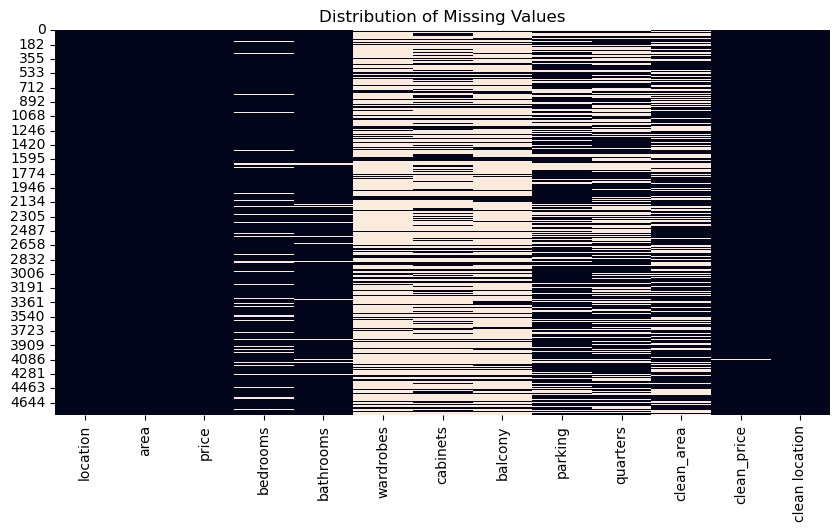

In [121]:
plot_missing_values(clean_df)

In [122]:
clean_df['wardrobes'].fillna('No', inplace=True)

C:\Users\Rootkit\AppData\Local\Temp\ipykernel_16480\3206409852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['wardrobes'].fillna('No', inplace=True)


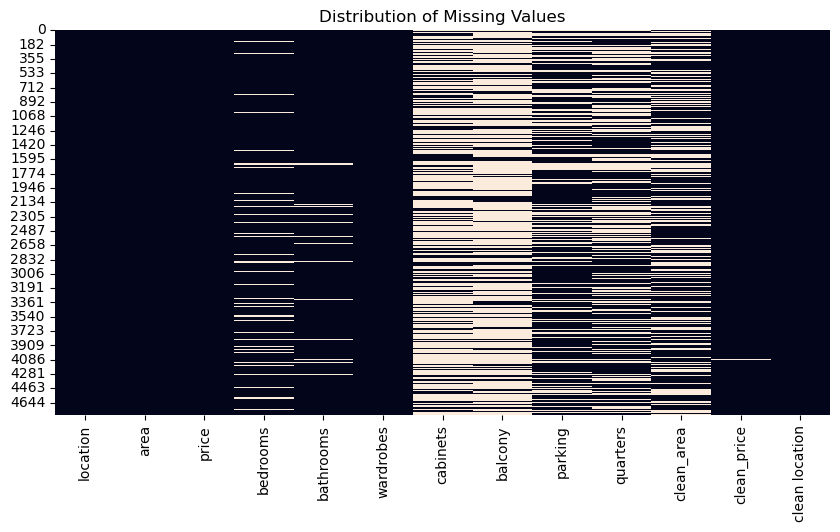

In [123]:
plot_missing_values(clean_df)

In [124]:
clean_df['cabinets'].fillna('No', inplace=True)
clean_df['balcony'].fillna('No', inplace=True)
clean_df['parking'].fillna('No', inplace=True)
clean_df['quarters'].fillna('No', inplace=True)	

C:\Users\Rootkit\AppData\Local\Temp\ipykernel_16480\2701374390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['cabinets'].fillna('No', inplace=True)
C:\Users\Rootkit\AppData\Local\Temp\ipykernel_16480\2701374390.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['balcony'].fillna('No', inplace=True)
C:\Users\Rootkit\AppData\Local\Temp\ipykernel_16480\2701374390.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

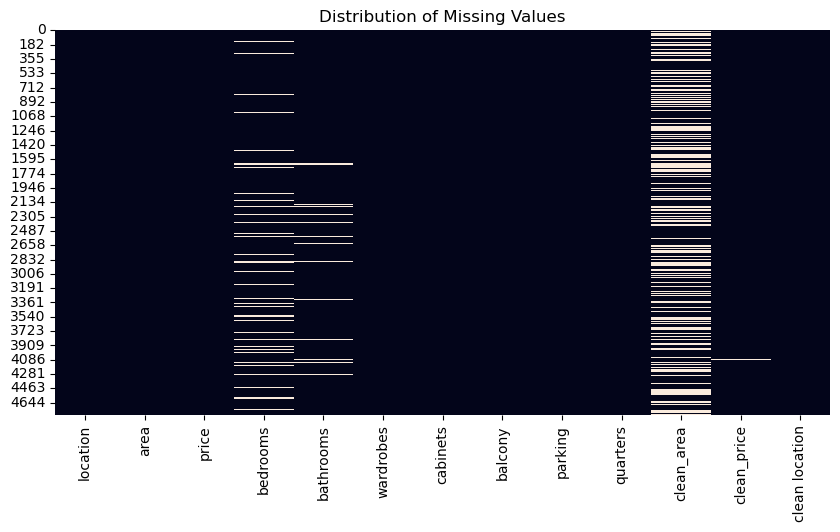

In [125]:
plot_missing_values(clean_df)

In [126]:
test = pd.DataFrame({'Class':['Data Science',None,None,
                              'Data Engineering',None,None,
                             'Software Development',None,None],
                    'Students': ['A','B','C','D','E','F','G','H','J']})

In [127]:
test['Class'].fillna(method='ffill')

0            Data Science
1            Data Science
2            Data Science
3        Data Engineering
4        Data Engineering
5        Data Engineering
6    Software Development
7    Software Development
8    Software Development
Name: Class, dtype: object

In [128]:
clean_df.dropna(inplace=True)

C:\Users\Rootkit\AppData\Local\Temp\ipykernel_16480\1483417257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df.dropna(inplace=True)


In [129]:
clean_df.corr()

C:\Users\Rootkit\AppData\Local\Temp\ipykernel_16480\1437785805.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  clean_df.corr()


,bedrooms,bathrooms,clean_area,clean_price
bedrooms,1.000000,0.631805,0.307968,0.042035
bathrooms,0.631805,1.000000,0.026755,0.036515
clean_area,0.307968,0.026755,1.000000,0.099264
clean_price,0.042035,0.036515,0.099264,1.000000


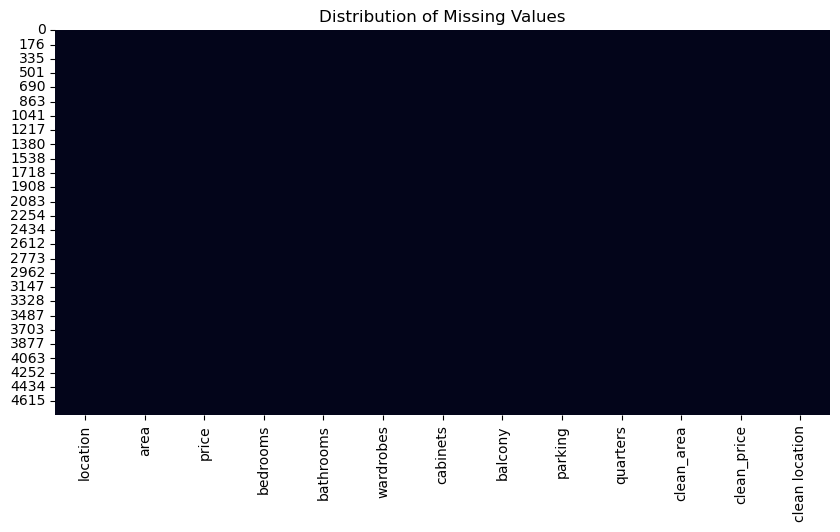

In [130]:
plot_missing_values(clean_df)

In [131]:
clean_df

,location,area,price,bedrooms,bathrooms,wardrobes,cabinets,balcony,parking,quarters,clean_area,clean_price,clean location
0,Kinyinya,25/35 m,55 000 000 Rwf,4.0,1.0,No,No,No,Yes,Yes,875.0,55000000.0,Kinyinya
2,Kabeza,25/30 m,45 000 000 Rwf,4.0,3.0,No,No,No,No,No,750.0,45000000.0,Kabeza
10,Kimironko,25/30 m,150 000 000 Rwf,4.0,3.0,No,No,No,No,No,750.0,150000000.0,Kimironko
14,Gisozi,20/30 m,50 000 000 Rwf,4.0,3.0,No,No,No,Yes,Yes,600.0,50000000.0,Gisozi
15,Kimironko,25/30 m,150 000 000 Rwf,5.0,3.0,No,No,No,Yes,Yes,750.0,150000000.0,Kimironko
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4780,Kibagabaga,20/30 m,85 000 000 Rwf,5.0,3.0,No,No,No,Yes,Yes,600.0,85000000.0,Kibagabaga
4782,Gisozi,59 sqm,71 000 $,1.0,1.0,No,No,Yes,Yes,No,59.0,92300000.0,Gisozi
4783,Kanombe,30/20 m,45 000 000 Rwf,4.0,3.0,Yes,Yes,Yes,Yes,No,600.0,45000000.0,Kanombe
4791,Kicukiro,25/25 m,65 000 000 Rwf,4.0,3.0,No,No,No,Yes,Yes,625.0,65000000.0,Kicukiro


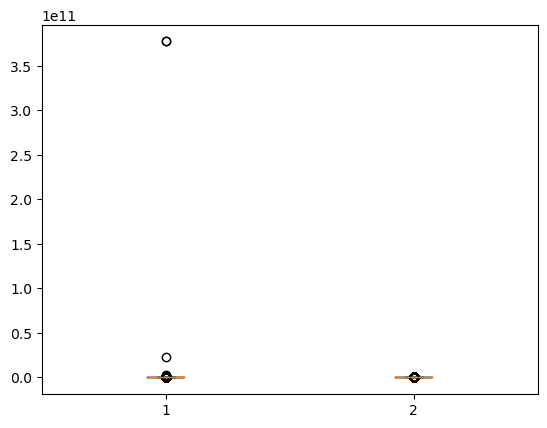

In [132]:
plt.boxplot(clean_df[['clean_price','clean_area']]);

In [133]:
clean_df = clean_df[clean_df['clean_price'] >= 10_000_000]
clean_df = clean_df[clean_df['clean_area'] >=300]

In [134]:
clean_df = clean_df[(clean_df['bathrooms'] <= 6) & (clean_df['bathrooms'] > 0)]

In [135]:
clean_df.shape

(2127, 13)

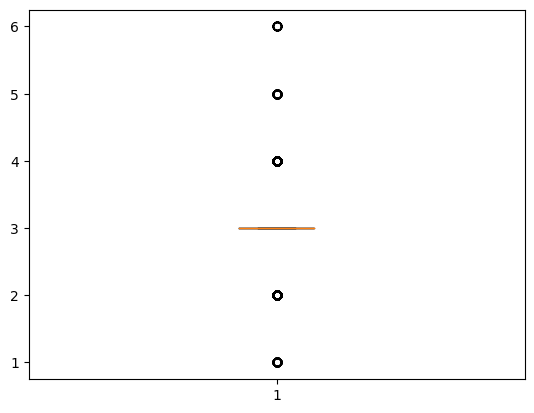

In [136]:
plt.boxplot(clean_df['bathrooms']);

# interquatels range method

In [137]:
clean_df['clean_price'].quantile([.9])

0.9    150000000.0
Name: clean_price, dtype: float64

In [138]:
# import numpy as np
def outliers_bounds(df, col_name):
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound 

In [139]:
area_boundd = outliers_bounds(clean_df,'clean_area')
area_boundd

(375.0, 975.0)

In [140]:
clean_df['clean_area'].quantile([.15,.9])

0.15    500.0
0.90    900.0
Name: clean_area, dtype: float64

In [141]:
clean_df = clean_df[(clean_df['clean_area']>=area_boundd[0]) & (clean_df['clean_area']<=area_boundd[1])]

In [142]:
price_bound = outliers_bounds(clean_df,'clean_price')
price_bound

(-2500000.0, 137500000.0)

In [143]:
clean_df = clean_df[(clean_df['clean_area']>=price_bound[0]) & (clean_df['clean_area']<=price_bound[1])]

In [144]:
clean_df.shape

(1904, 13)

# creating bins

In [145]:
clean_df['clean_area'].value_counts()

750.0    725
600.0    484
500.0    277
900.0    112
625.0     88
840.0     60
875.0     55
400.0     50
700.0      9
944.0      6
575.0      4
720.0      4
810.0      3
375.0      3
480.0      3
800.0      3
450.0      2
806.0      2
525.0      2
440.0      2
520.0      2
749.0      1
540.0      1
610.0      1
396.0      1
550.0      1
869.0      1
640.0      1
570.0      1
Name: clean_area, dtype: int64

In [146]:
clean_df['area category']=(
    pd.cut(
        clean_df['clean_area'],
        bins=[300,399,499,599,699,799,899,999],
        labels=['300-400','400-500','500-600','600-700','700-800','800-900','900+']
        )
)

In [147]:
clean_df.columns

Index(['location', 'area', 'price', 'bedrooms', 'bathrooms', 'wardrobes',
       'cabinets', 'balcony', 'parking', 'quarters', 'clean_area',
       'clean_price', 'clean location', 'area category'],
      dtype='object')

In [148]:
clean_final = clean_df[['clean location','area category','clean_price','bedrooms', 'bathrooms', 'wardrobes',
       'cabinets', 'balcony', 'parking', 'quarters']]

In [149]:
clean_final.columns = [col.replace('clean','').replace('category','').replace('_','').replace(' ','') for col in clean_final.columns]

In [150]:
clean_final

,location,area,price,bedrooms,bathrooms,wardrobes,cabinets,balcony,parking,quarters
0,Kinyinya,800-900,55000000.0,4.0,1.0,No,No,No,Yes,Yes
2,Kabeza,700-800,45000000.0,4.0,3.0,No,No,No,No,No
10,Kimironko,700-800,150000000.0,4.0,3.0,No,No,No,No,No
14,Gisozi,600-700,50000000.0,4.0,3.0,No,No,No,Yes,Yes
15,Kimironko,700-800,150000000.0,5.0,3.0,No,No,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...
4776,Kanombe,700-800,60000000.0,4.0,3.0,No,No,No,No,No
4780,Kibagabaga,600-700,85000000.0,5.0,3.0,No,No,No,Yes,Yes
4783,Kanombe,600-700,45000000.0,4.0,3.0,Yes,Yes,Yes,Yes,No
4791,Kicukiro,600-700,65000000.0,4.0,3.0,No,No,No,Yes,Yes


In [151]:
clean_final['location'].value_counts()

Kanombe                  460
Kibagabaga               341
Kimironko                278
Kicukiro                 216
Gacuriro                 121
Kabeza                    90
Gisozi                    82
Kagarama                  53
Kabuga/Ndera/Rusororo     49
Gatenga/Gikondo           41
Remera                    41
Masaka                    40
Kagugu                    22
Kinyinya                  18
Niboyi                    14
Kacyiru                   13
Zindiro                   10
Nyamata                    8
Nyarutarama                6
Kiyovu                     1
Name: location, dtype: int64

In [53]:
d = pd.get_dummies(clean_final['location'])
len(d.columns)

20

In [54]:
def create_dummies(df,cols_n,dumy_cols):
    df1 = df[cols_n]
    df2 = pd.get_dummies(clean_final[dumy_cols])
    df = pd.concat([df1,df2], axis=1)
    return df

In [55]:
cat = list(clean_final.select_dtypes('object').columns)
nums = list(clean_final.select_dtypes(include='number').columns)

In [56]:
nums

['price', 'bedrooms', 'bathrooms']

In [57]:
clean_final = create_dummies(clean_final,nums,cat)

In [58]:
len(clean_final.columns)

33

# MODELING
## MODEL AND PERFORMANCE METRICS

In [59]:
from sklearn.metrics import mean_absolute_error, r2_score

In [60]:
r2_score([200,300,400],
                    [195,260,300])

0.41874999999999996

# Data split

In [61]:
X = clean_final.drop(columns=['price'])  # features 
y = clean_final['price']  # target



In [152]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split    
from sklearn.metrics import accuracy_score

In [63]:
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size=.2, random_state=42)

In [64]:
model = LinearRegression()
model.fit(X_train,y_train)



LinearRegression()

In [65]:
print(mean_absolute_error(y_train,model.predict(X_train)))
print(mean_absolute_error(y_test,model.predict(X_test)))

25424250.326986212
83606829.5223097


In [158]:
def train_tesy_model(features,target,test_size,selected_model,metric):
    X_train,X_test, y_train,y_test=train_test_split(features,target,test_size=test_size,random_state=42)
    model = selected_model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    return round(metric(y_test,predictions),2)

In [160]:
linear = LinearRegression()
metric = mean_absolute_error
train_tesy_model(X,y,0.2,linear,metric)

83606829.52

In [72]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor



In [79]:
ridge = Ridge()
metric = mean_absolute_error
train_tesy_model(X,y,0.2,ridge,metric)

82719560.33

In [80]:
lassor = Lasso()
metric = mean_absolute_error
train_tesy_model(X,y,0.2,lassor,metric)

c:\Users\Rootkit\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.530e+18, tolerance: 1.369e+15
  model = cd_fast.enet_coordinate_descent(


82720835.99

In [81]:
elasticnet = ElasticNet()
metric = mean_absolute_error
train_tesy_model(X,y,0.2,elasticnet,metric)

82691485.12

In [82]:
tree = DecisionTreeRegressor()
metric = mean_absolute_error
train_tesy_model(X,y,0.2,tree,metric)

78710990.29

In [87]:
foresst = RandomForestRegressor()
metric = mean_absolute_error
train_tesy_model(X,y,0.2,foresst,metric)

77438569.23

In [86]:
gb = GradientBoostingRegressor()
metric = mean_absolute_error
train_tesy_model(X,y,0.2,gb,metric)

77850956.62